# Support Vector Machine Assignment

## Dataset - forestfires

In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [70]:
# Load The dataset
df = pd.read_csv('C:/Users/DELL 5459\Downloads/excelr/Assignment/17 Support vector Machines/forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [72]:
df = df.drop(df.columns[11:30], axis=1)

In [73]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


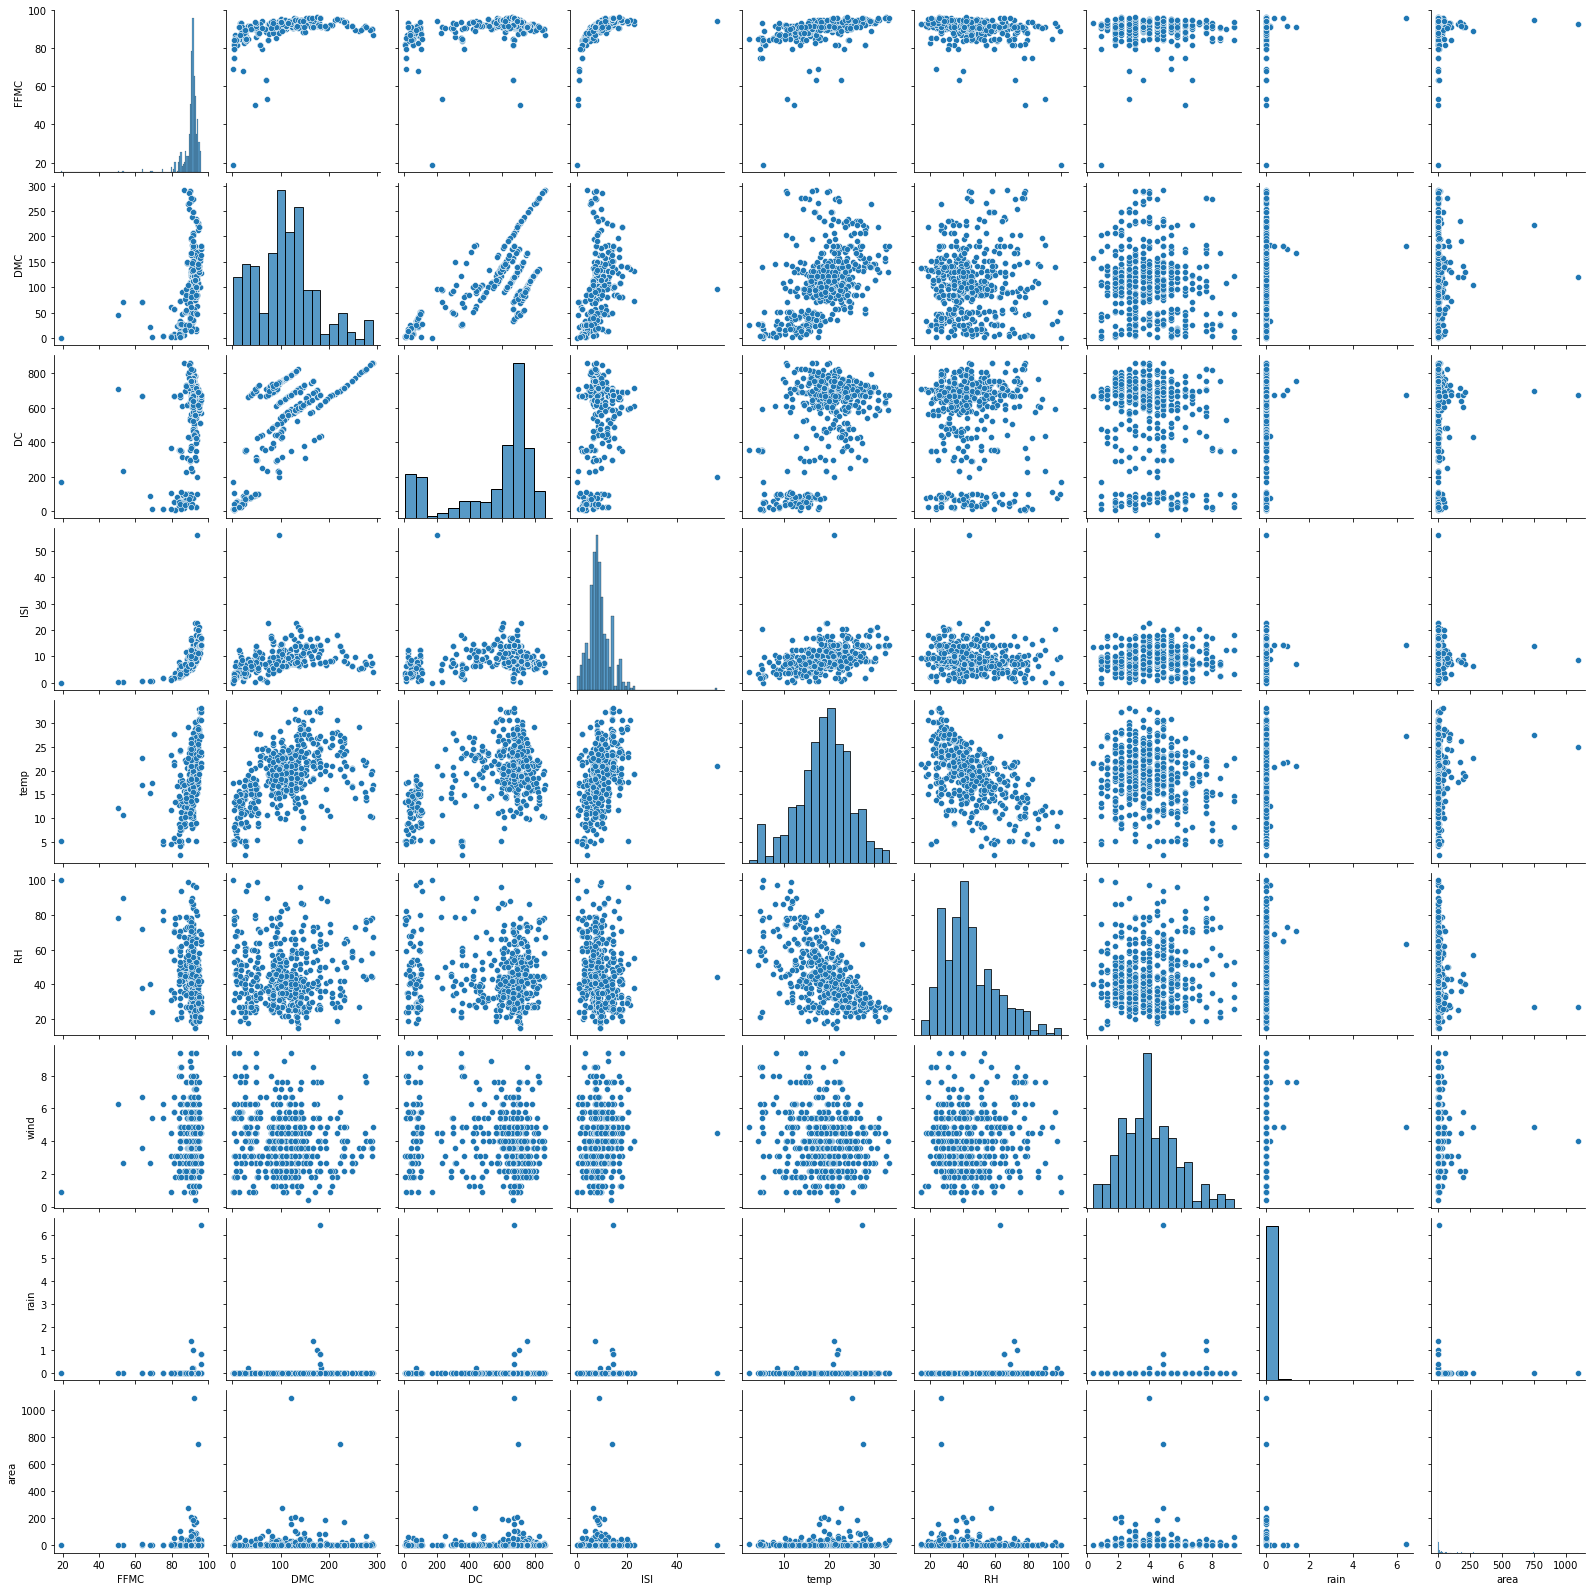

In [74]:
sns.pairplot(data=df)

In [75]:
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


In [76]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['size_category']=label_encoder.fit_transform(df['size_category'])

In [77]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [78]:
# Converting categorical  values of days annd months into integers

df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace =True)

df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [79]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


### Extracting Independent and Dependent Variables

In [80]:
X = df.iloc[:,0:11].values
Y = df.iloc[:,-1].values

In [81]:
X

array([[ 3.  ,  5.  , 86.2 , ...,  6.7 ,  0.  ,  0.  ],
       [10.  ,  2.  , 90.6 , ...,  0.9 ,  0.  ,  0.  ],
       [10.  ,  6.  , 90.6 , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 8.  ,  7.  , 81.6 , ...,  6.7 ,  0.  , 11.16],
       [ 8.  ,  6.  , 94.4 , ...,  4.  ,  0.  ,  0.  ],
       [11.  ,  2.  , 79.5 , ...,  4.5 ,  0.  ,  0.  ]])

In [82]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [83]:
# Splitting the dataset into training and test set.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30, random_state=30)

In [84]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((361, 11), (361,), (156, 11), (156,))

## Grid Search CV

### Kernel rbf

In [85]:
clf =SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[1,5,14,13,12,11,10,0.1,0.001]}]
gsv = GridSearchCV(clf, param_grid,cv=10)
gsv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 5, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [86]:
gsv.best_params_ , gsv.best_score_

({'C': 5, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7367867867867868)

In [87]:
clf = SVC(C =5 , gamma= 0.5)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) *100
print('Accuracy', acc)
confusion_matrix(Y_test, y_pred)

Accuracy 74.35897435897436


array([[  2,  40],
       [  0, 114]], dtype=int64)

#### We will change the gamma and C parameter values and see the results

In [88]:
clf1 = SVC()
param_grid1 = [{'kernel':['rbf'],'gamma':[5,0.5,0.2,0.1,0.05],'C':[15,14,20,30,35,48,12,16,29] }]
gsv1 = GridSearchCV(clf1,param_grid1,cv=10)
gsv1.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['rbf']}])

In [89]:
gsv1.best_params_ , gsv1.best_score_

({'C': 15, 'gamma': 0.05, 'kernel': 'rbf'}, 0.7451201201201202)

In [90]:
clf1 = SVC(C= 15, gamma = 0.05)
clf1.fit(X_train, Y_train)
y_pred = clf1.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy', acc)
confusion_matrix(Y_test, y_pred)

Accuracy 74.35897435897436


array([[  3,  39],
       [  1, 113]], dtype=int64)

## Polynomial Kernel

In [91]:
clf2 = SVC()
param_grid2 = [{'kernel':['poly'],'gamma':[50,5,0.5,0.2,0.1,0.05],'C':[15,14,20,30,35,48,12,16,29]}]
gsv2 = GridSearchCV(clf2, param_grid2, cv=10)
gsv2.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [50, 5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['poly']}])

In [92]:
gsv2.best_params_, gsv2.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'poly'}, 0.9722222222222221)

In [93]:
clf2= SVC(C=15, gamma=50, kernel = 'poly')
clf2.fit(X_train, Y_train)
y_pred = clf2.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
print('Accuracy',  acc)
confusion_matrix(Y_test, y_pred)

Accuracy 0.9615384615384616


array([[ 39,   3],
       [  3, 111]], dtype=int64)

### Sigmoid Kernel

In [94]:
clf3 = SVC()
param_grid3 = [{'kernel':['sigmoid'], 'gamma':[30,50,5,0.5,0.2,0.1,0.05],"C":[15,14,20,30,35,48,12,16,29]}]
gsv3 = GridSearchCV(clf3, param_grid3, cv =10)
gsv3.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [30, 50, 5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['sigmoid']}])

In [95]:
gsv3.best_params_, gsv3.best_score_

({'C': 15, 'gamma': 30, 'kernel': 'sigmoid'}, 0.7313063063063063)

In [96]:
clf = SVC(C=15, gamma=30, kernel= 'sigmoid')
clf3.fit(X_train, Y_train)
y_pred = clf3.predict(X_test)
acc= accuracy_score(Y_test, y_pred) * 100
print('Accuracy', acc)
confusion_matrix(Y_test, y_pred)


Accuracy 74.35897435897436


array([[  2,  40],
       [  0, 114]], dtype=int64)

# Conclusion - Polynomial kernel gives better result as compared to others

Object `svc` not found.
